In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('/kaggle/input/flight-delay/Flight_delay.csv')

In [3]:
df.head()

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,UniqueCarrier,Airline,FlightNum,TailNum,ActualElapsedTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,WN,Southwest Airlines Co.,3920,N464WN,90,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,WN,Southwest Airlines Co.,509,N763SW,240,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,WN,Southwest Airlines Co.,1333,N334SW,121,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,WN,Southwest Airlines Co.,675,N286WN,228,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,WN,Southwest Airlines Co.,4,N674AA,123,...,4,9,0,N,0,0,0,0,0,16


In [4]:
df.drop(columns=['FlightNum','TailNum','UniqueCarrier'])

,DayOfWeek,Date,DepTime,ArrTime,CRSArrTime,Airline,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,4,03-01-2019,1829,1959,1925,Southwest Airlines Co.,90,90,77,34,...,3,10,0,N,0,2,0,0,0,32
1,4,03-01-2019,1937,2037,1940,Southwest Airlines Co.,240,250,230,57,...,3,7,0,N,0,10,0,0,0,47
2,4,03-01-2019,1644,1845,1725,Southwest Airlines Co.,121,135,107,80,...,6,8,0,N,0,8,0,0,0,72
3,4,03-01-2019,1452,1640,1625,Southwest Airlines Co.,228,240,213,15,...,7,8,0,N,0,3,0,0,0,12
4,4,03-01-2019,1323,1526,1510,Southwest Airlines Co.,123,135,110,16,...,4,9,0,N,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484546,5,13-06-2019,1609,1942,1915,American Airlines Inc.,153,160,131,27,...,7,15,0,N,0,27,0,0,0,0
484547,6,14-06-2019,1616,1954,1915,American Airlines Inc.,158,160,136,39,...,11,11,0,N,0,11,0,0,0,28
484548,2,17-06-2019,1617,2002,1915,American Airlines Inc.,165,160,141,47,...,7,17,0,N,0,0,22,5,0,20
484549,7,22-06-2019,1607,1941,1915,American Airlines Inc.,154,160,137,26,...,5,12,0,N,0,1,0,0,0,25


In [5]:
df.isnull().sum()
df.Org_Airport.mode()
df.Dest_Airport.mode()
df['Org_Airport'] = df['Org_Airport'].fillna(df['Org_Airport'].mode()[0])
df['Dest_Airport'] = df['Dest_Airport'].fillna(df['Dest_Airport'].mode()[0])

<Axes: ylabel='Airline'>

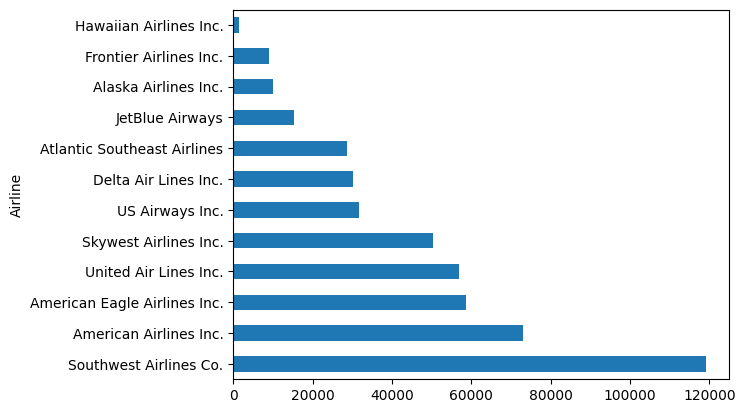

In [6]:
Airlines=df.Airline.unique()
flights=df.Airline.value_counts()
flights.plot(kind='barh')

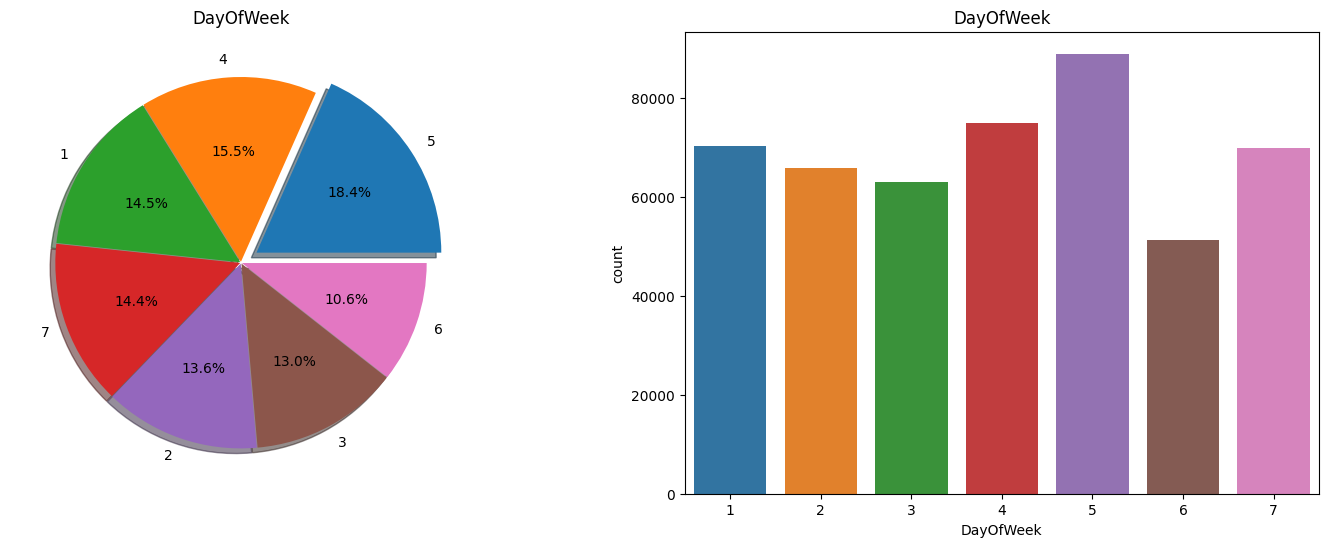

DayOfWeek represents whether the flight was on delayed on Monday-(1), Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)


In [7]:
f,ax=plt.subplots(1,2,figsize=(18,6))
df['DayOfWeek'].value_counts().plot.pie(explode=[0.1,0.005,0.005,0.005,0.005,0.005,0.005],autopct='%1.1f%%',ax=ax[0],shadow=True) 
ax[0].set_title('DayOfWeek')
ax[0].set_ylabel('')
sns.countplot(x='DayOfWeek', data=df, ax=ax[1])
ax[1].set_title('DayOfWeek')
plt.show()

print('DayOfWeek represents whether the flight was on delayed on Monday-(1), Tuesday-(2),Wednesday - (3),Thursday- (4), Friday- (5), Saturday- (6), Sunday- (7)')

In [8]:
cancelled_flights = df.groupby('Airline')['Cancelled'].sum().reset_index()

# Rename the column for clarity
cancelled_flights = cancelled_flights.rename(columns={'Cancelled': 'TotalCancelledFlights'})

# Display the result
print(cancelled_flights)

                         Airline  TotalCancelledFlights
0           Alaska Airlines Inc.                      0
1         American Airlines Inc.                      0
2   American Eagle Airlines Inc.                      0
3    Atlantic Southeast Airlines                      0
4           Delta Air Lines Inc.                      0
5         Frontier Airlines Inc.                      0
6         Hawaiian Airlines Inc.                      0
7                JetBlue Airways                      0
8          Skywest Airlines Inc.                      0
9         Southwest Airlines Co.                      0
10               US Airways Inc.                      0
11         United Air Lines Inc.                      0


In [9]:
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Replace non-zero values with 1 in the delay columns
df[delay_columns] = df[delay_columns].applymap(lambda x: 1 if x != 0 else 0)

# Display the modified DataFrame to verify changes
print(df[delay_columns].head())
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df['Delays'] = df[delay_columns].sum(axis=1)
delay_summary = df.groupby('Airline')[delay_columns].sum().reset_index()

# Step 2: Add a new column 'TotalDelays' which is the sum of all delay categories
delay_summary['TotalDelays'] = delay_summary[delay_columns].sum(axis=1)

# Display the updated DataFrame
print(delay_summary)
df.to_csv("delay_summary.csv", index=False)

<ipython-input-9-890b88b3f06f>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[delay_columns] = df[delay_columns].applymap(lambda x: 1 if x != 0 else 0)


   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay
0             1             0         0              0                  1
1             1             0         0              0                  1
2             1             0         0              0                  1
3             1             0         0              0                  1
4             0             0         0              0                  1
                         Airline  CarrierDelay  WeatherDelay  NASDelay  \
0           Alaska Airlines Inc.          5284           310      5386   
1         American Airlines Inc.         39649          7039     45622   
2   American Eagle Airlines Inc.         26078          6853     35189   
3    Atlantic Southeast Airlines         19762          5296     15004   
4           Delta Air Lines Inc.         17359          1881     19275   
5         Frontier Airlines Inc.          5779           359      7424   
6         Hawaiian Airlines Inc.      

In [ ]:
# Define delay columns
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

delay_summary = df.groupby('Airline')[delay_columns].sum()

# Step 2: Plot a pie chart for each airline
for airline in delay_summary.index:
    plt.figure(figsize=(8, 8))
    plt.pie(
        delay_summary.loc[airline],
        labels=delay_columns,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Paired.colors
    )
    plt.title(f'Impact of Delay Types for {airline}')
    plt.show()
    plt.savefig('plot.png')

In [11]:
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Create a 'Route' column by combining 'Origin' and 'Destination'
df['Route'] = df['Org_Airport'] + ' - ' + df['Dest_Airport']

# Group by 'Route' and sum the delays for each route
delays_per_route = df.groupby('Route')[delay_columns].sum().reset_index()

# Create a new column that gives the total number of delays across all categories for each route
delays_per_route['TotalDelays'] = delays_per_route[delay_columns].sum(axis=1)
print(delays_per_route)
df.to_csv("delays_per_route.csv", index=False) 
# Display the result


                                                  Route  CarrierDelay  \
0     Abilene Regional Airport - Dallas/Fort Worth I...            94   
1     Abraham Lincoln Capital Airport - Chicago O'Ha...             8   
2     Adak Airport - Ted Stevens Anchorage Internati...             1   
3     Akron-Canton Regional Airport - Chicago O'Hare...             4   
4     Akron-Canton Regional Airport - Cincinnati/Nor...             0   
...                                                 ...           ...   
3338  Yellowstone Regional Airport - Denver Internat...             3   
3339  Yellowstone Regional Airport - Salt Lake City ...             1   
3340  Yuma International Airport - Chicago O'Hare In...            20   
3341  Yuma International Airport - Los Angeles Inter...            26   
3342  Yuma International Airport - Salt Lake City In...            13   

      WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  TotalDelays  
0               17        82              0  

In [12]:
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Create a 'Route' column by combining 'Org_Airport' and 'Dest_Airport'
df['Route'] = df['Org_Airport'] + ' - ' + df['Dest_Airport']

# Group by both 'Route' and 'Airline' and sum the delays for each group
delays_per_route_airline = df.groupby(['Route', 'Airline'])[delay_columns].sum().reset_index()

# Create a new column that gives the total number of delays across all categories for each route-airline combination
delays_per_route_airline['TotalDelays'] = delays_per_route_airline[delay_columns].sum(axis=1)

# Display the result
print(delays_per_route_airline)
df.to_csv("delays_per_route_airline.csv", index=False) 

                                                  Route  \
0     Abilene Regional Airport - Dallas/Fort Worth I...   
1     Abraham Lincoln Capital Airport - Chicago O'Ha...   
2     Adak Airport - Ted Stevens Anchorage Internati...   
3     Akron-Canton Regional Airport - Chicago O'Hare...   
4     Akron-Canton Regional Airport - Cincinnati/Nor...   
...                                                 ...   
4602  Yellowstone Regional Airport - Denver Internat...   
4603  Yellowstone Regional Airport - Salt Lake City ...   
4604  Yuma International Airport - Chicago O'Hare In...   
4605  Yuma International Airport - Los Angeles Inter...   
4606  Yuma International Airport - Salt Lake City In...   

                           Airline  CarrierDelay  WeatherDelay  NASDelay  \
0     American Eagle Airlines Inc.            94            17        82   
1            Skywest Airlines Inc.             8             1        38   
2             Alaska Airlines Inc.             1             0 

In [13]:
df['Route'] = df['Org_Airport'] + ' - ' + df['Dest_Airport']
delays_per_route_airline = df.groupby(['Route', 'Airline'])[delay_columns].sum().reset_index()


delays_per_route_airline['TotalDelays'] = delays_per_route_airline[delay_columns].sum(axis=1)


airlines = delays_per_route_airline['Airline'].unique()
airline_routes = {}

for airline in airlines:
    airline_df = delays_per_route_airline[delays_per_route_airline['Airline'] == airline]
    airline_routes[airline] = airline_df.reset_index(drop=True)


for airline, routes_df in airline_routes.items():
    print(f"\nAirline: {airline}")
    print(routes_df)

df.to_csv("routes_df_RL.csv", index=False) 


Airline: American Eagle Airlines Inc.
                                                 Route  \
0    Abilene Regional Airport - Dallas/Fort Worth I...   
1    Albany International Airport - Chicago O'Hare ...   
2    Alexandria International Airport - Dallas/Fort...   
3    Austin-Bergstrom International Airport - Dalla...   
4    Baltimore-Washington International Airport - C...   
..                                                 ...   
395  Wichita Dwight D. Eisenhower National Airport ...   
396  Wichita Falls Municipal Airport/Sheppard AFB -...   
397  Will Rogers World Airport - Chicago O'Hare Int...   
398  Will Rogers World Airport - Dallas/Fort Worth ...   
399  William P. Hobby Airport - Dallas/Fort Worth I...   

                          Airline  CarrierDelay  WeatherDelay  NASDelay  \
0    American Eagle Airlines Inc.            94            17        82   
1    American Eagle Airlines Inc.            30            10        82   
2    American Eagle Airlines Inc.      

In [14]:
num_airports = df['Dest_Airport'].nunique()
print(num_airports)

259


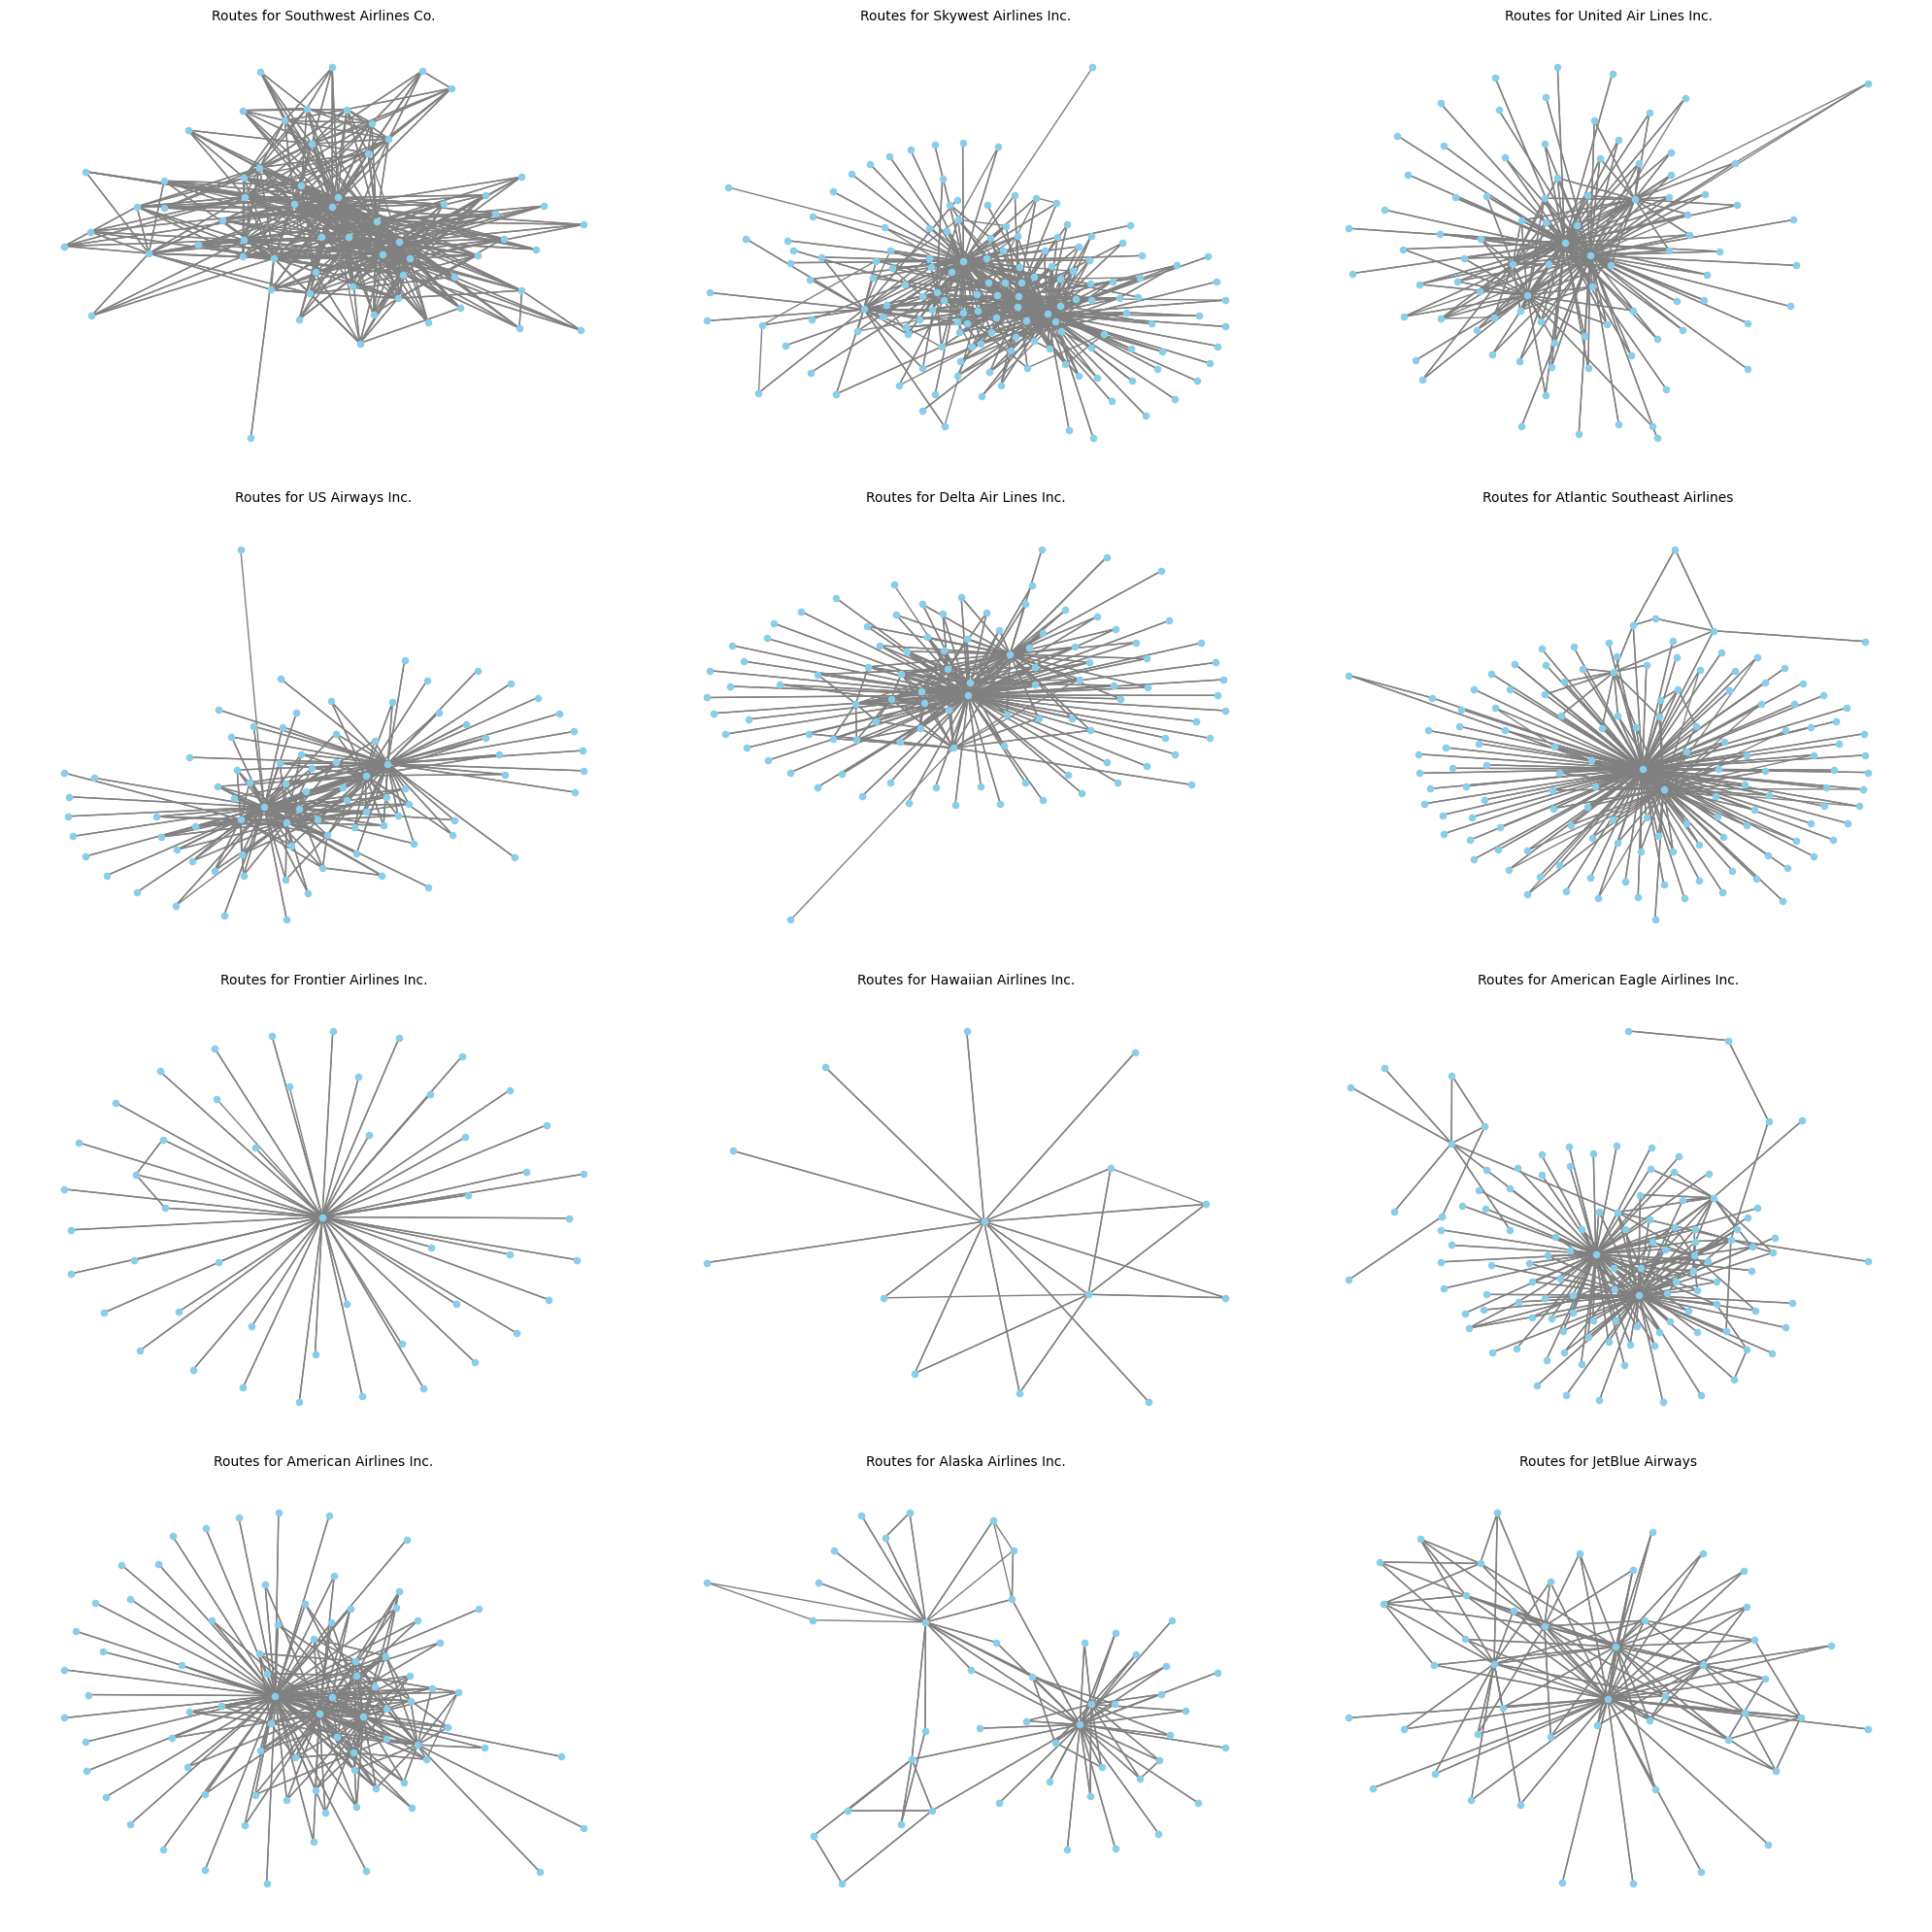

In [15]:
import networkx as nx
import matplotlib.pyplot as plt

# Get the unique list of airlines
airlines = df['Airline'].unique()

# Create a figure with subplots for each airline
fig, axes = plt.subplots(4, 3, figsize=(20, 20))  # Adjust the grid size based on the number of airlines
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Loop through each airline and create a graph for its routes
for i, airline in enumerate(airlines):
    # Filter the data for the current airline
    airline_data = df[df['Airline'] == airline]
    
    # Create a graph for this airline
    G = nx.DiGraph()
    
    # Add edges for each route (from Org_Airport to Dest_Airport)
    for index, row in airline_data.iterrows():
        G.add_edge(row['Org_Airport'], row['Dest_Airport'])
    
    # Draw the graph on the corresponding subplot
    pos = nx.spring_layout(G, k=0.3, iterations=50)
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color='skyblue', ax=axes[i])
    nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=False, ax=axes[i])
    
    # Add the airline name as the subplot title
    axes[i].set_title(f"Routes for {airline}", fontsize=10)
    axes[i].axis('off')  # Hide axes for clarity

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
average_delay_per_airline = df.groupby('Airline')['ArrDelay'].mean().reset_index()

# Rename the columns for clarity
average_delay_per_airline.rename(columns={'ArrDelay': 'AverageArrivalDelay'}, inplace=True)

# Display the result
print(average_delay_per_airline)
df.to_csv("average_delay_per_airline.csv", index=False) 

                         Airline  AverageArrivalDelay
0           Alaska Airlines Inc.            57.557600
1         American Airlines Inc.            65.729621
2   American Eagle Airlines Inc.            64.277233
3    Atlantic Southeast Airlines            63.210684
4           Delta Air Lines Inc.            59.292422
5         Frontier Airlines Inc.            41.973710
6         Hawaiian Airlines Inc.            55.658333
7                JetBlue Airways            72.869370
8          Skywest Airlines Inc.            65.187659
9         Southwest Airlines Co.            51.032945
10               US Airways Inc.            58.454165
11         United Air Lines Inc.            69.670539


In [ ]:
def determine_delay_cause(row):
    if row['ArrDelay'] > 0:
        # Create a dictionary of delay types and their values
        delay_types = {
            'Carrier Delay': row['CarrierDelay'],
            'Weather Delay': row['WeatherDelay'],
            'NAS Delay': row['NASDelay'],
            'Security Delay': row['SecurityDelay'],
            'Late Aircraft Delay': row['LateAircraftDelay']
        }
        # Find the delay type with the maximum value
        max_delay_type = max(delay_types, key=delay_types.get)
        # Check if the max delay is greater than 0
        if delay_types[max_delay_type] > 0:
            return max_delay_type
        else:
            return "Unknown Delay"
    else:
        return "No Delay"

# Sample usage on a DataFrame
# Assuming 'df' is the DataFrame containing your flight data
df['DelayCause'] = df.apply(determine_delay_cause, axis=1)

# Display the result
print(df[['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DelayCause']].head())


# **Prediction**


In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Binary Classification Target
df['IsDelayed'] = (df['ArrDelay'] > 15).astype(int)

# Step 2: Feature Selection
features = ["Airline", "DayOfWeek", "Origin", "Dest", "DepTime", "CRSElapsedTime"]

# Step 3: Create Interaction Term: Airline x Origin
df['Airline_Origin'] = df['Airline'].astype(str) + "_" + df['Origin'].astype(str)
interaction_encoder = LabelEncoder()
df['Airline_Origin_Encoded'] = interaction_encoder.fit_transform(df['Airline_Origin'])

# Step 4: Encode Features
label_encoders = {col: LabelEncoder() for col in features}
for col, encoder in label_encoders.items():
    df[col] = encoder.fit_transform(df[col])

# Include interaction term in features
features.append('Airline_Origin_Encoded')

# Step 5: Encode Delay Cause
df['DelayCause'] = df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].idxmax(axis=1)
delay_cause_encoder = LabelEncoder()
df['DelayCauseEncoded'] = delay_cause_encoder.fit_transform(df['DelayCause'])

# Step 6: Train-Test Split
# Stage 1: Binary Classification
X1 = df[features]
y1 = df['IsDelayed']

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1_resampled, y1_resampled, test_size=0.2, random_state=42)

# Stage 2: Regression for Delay Duration
delayed_data = df[df['ArrDelay'] > 15]  # Only delayed flights
X2 = delayed_data[features]
y2 = delayed_data['ArrDelay']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Stage 3: Multi-class Classification for Delay Cause
X3 = delayed_data[features]
y3 = delayed_data['DelayCauseEncoded']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Stage 1 - Binary Classification Report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     94215
           1       0.97      0.96      0.96     94397

    accuracy                           0.96    188612
   macro avg       0.96      0.96      0.96    188612
weighted avg       0.96      0.96      0.96    188612



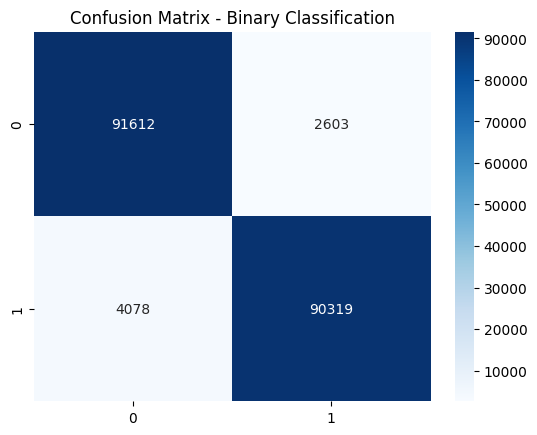

Stage 1 - ROC-AUC Score: 0.9901288348171057
Stage 2 - Regression Evaluation
Mean Absolute Error (MAE): 34.162293474935346
Mean Squared Error (MSE): 2724.562214949997
Stage 3 - Delay Cause Classification Report
                   precision    recall  f1-score   support

     CarrierDelay       0.55      0.51      0.52     28542
LateAircraftDelay       0.64      0.78      0.70     44467
         NASDelay       0.54      0.39      0.45     17577
    SecurityDelay       0.14      0.05      0.07       175
     WeatherDelay       0.27      0.05      0.08      3545

         accuracy                           0.60     94306
        macro avg       0.42      0.36      0.37     94306
     weighted avg       0.58      0.60      0.58     94306



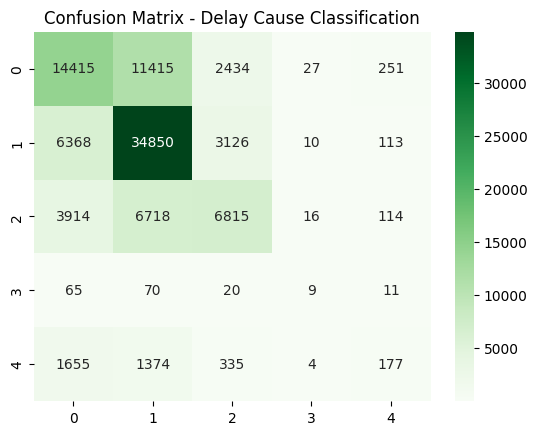

In [7]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced']
}

classifier = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1', verbose=1)
classifier.fit(X1_train, y1_train)

# Evaluate Classification
y1_pred = classifier.predict(X1_test)
print("Stage 1 - Binary Classification Report")
print(classification_report(y1_test, y1_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y1_test, y1_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Binary Classification")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y1_test, classifier.predict_proba(X1_test)[:, 1])
print(f"Stage 1 - ROC-AUC Score: {roc_auc}")

# Stage 2: Regression
regressor = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
regressor.fit(X2_train, y2_train)
y2_pred = regressor.predict(X2_test)

# Evaluate Regression
mae = mean_absolute_error(y2_test, y2_pred)
mse = mean_squared_error(y2_test, y2_pred)
print(f"Stage 2 - Regression Evaluation\nMean Absolute Error (MAE): {mae}\nMean Squared Error (MSE): {mse}")

# Stage 3: Multi-class Classification with Gradient Boosting
from xgboost import XGBClassifier

cause_classifier = XGBClassifier(n_estimators=200, max_depth=10, random_state=42)
cause_classifier.fit(X3_train, y3_train)
y3_pred = cause_classifier.predict(X3_test)

# Evaluate Multi-class Classification
print("Stage 3 - Delay Cause Classification Report")
print(classification_report(y3_test, y3_pred, target_names=delay_cause_encoder.classes_))

# Confusion Matrix
sns.heatmap(confusion_matrix(y3_test, y3_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Delay Cause Classification")
plt.show()


In [8]:
new_data = df.sample(10).copy()
X_new = new_data[features]

# Stage 1: Prédire le statut du retard
delay_predictions = classifier.predict(X_new)

# Stage 2: Prédire la durée du retard
delayed_indices = [i for i, delay in enumerate(delay_predictions) if delay == 1]
delay_duration_predictions = [0] * len(new_data)
delay_cause_predictions = [None] * len(new_data)

if delayed_indices:
    X_delayed = X_new.iloc[delayed_indices]
    delay_durations = regressor.predict(X_delayed)
    delay_causes = cause_classifier.predict(X_delayed)

    for idx, duration, cause in zip(delayed_indices, delay_durations, delay_causes):
        delay_duration_predictions[idx] = duration
        delay_cause_predictions[idx] = delay_cause_encoder.inverse_transform([cause])[0]

# Final predictions
new_data['PredictedDelayStatus'] = delay_predictions
new_data['PredictedDelayDuration'] = delay_duration_predictions
new_data['PredictedDelayCause'] = delay_cause_predictions

print("\nPrédictions sur de nouvelles données:")
print(new_data[['Airline', 'Origin', 'Dest', 'PredictedDelayStatus', 'PredictedDelayDuration', 'PredictedDelayCause']])


Prédictions sur de nouvelles données:
        Airline  Origin  Dest  PredictedDelayStatus  PredictedDelayDuration  \
235201        2     223   140                     1               55.021983   
150845        2     190   270                     1               79.625699   
297738       10     199   223                     1               42.468546   
26737         8     208   233                     1               79.726462   
240453        2     190   159                     1               79.320827   
391859        1      74   191                     1               63.258247   
189160        9      42    58                     1               43.378143   
477831        1     156   190                     1               72.127581   
113060        8     190   191                     1               97.436500   
292830       11      73   184                     1               65.486685   

       PredictedDelayCause  
235201   LateAircraftDelay  
150845   LateAircraftDelay  
2977

In [ ]:
joblib.dump(classifier, 'classifier.pkl')  # Modèle de classification
joblib.dump(regressor, 'regressor.pkl')  # Modèle de régression
joblib.dump(cause_classifier, 'cause_classifier.pkl')  # Modèle de classification des causes

# Enregistrer les encodeurs
joblib.dump(label_encoders, 'label_encoders.pkl')  # Encodeurs des colonnes
joblib.dump(interaction_encoder, 'interaction_encoder.pkl')  # Encodeur pour Airline_Origin
joblib.dump(delay_cause_encoder, 'delay_cause_encoder.pkl')  # Encodeur pour DelayCause

In [9]:
def predict_delay(airline, day_of_week, origin, dest, classifier, regressor, cause_classifier, 
                  label_encoders, interaction_encoder, delay_cause_encoder):

    # Prepare input data with default/fixed values for DepTime and CRSElapsedTime
    dep_time = 1200  # Default departure time (e.g., 12:00 PM)
    crs_elapsed_time = 200  # Default CRS elapsed time (e.g., 300 minutes)
    
    input_data = {
        "Airline": airline,
        "DayOfWeek": day_of_week,
        "Origin": origin,
        "Dest": dest,
        "DepTime": dep_time,
        "CRSElapsedTime": crs_elapsed_time,
    }
    input_df = pd.DataFrame([input_data])

    # Encode the features, ensuring that unseen categories are handled
    for feature, encoder in label_encoders.items():
        if feature in input_df.columns:
            # Handle unseen categories by checking if the category exists in the encoder's classes_
            try:
                # Try transforming the value; if unseen, fall back to a default value or ignore
                input_df[feature] = encoder.transform(input_df[feature])
            except ValueError:
                # Handle unseen category gracefully by assigning a default value or skipping
                print(f"Warning: '{input_df[feature].iloc[0]}' is not seen during training. Using default encoding.")
                # You can set a default index for unseen categories if needed
                input_df[feature] = encoder.transform([encoder.classes_[0]])  # Use first class as default

    # Create the interaction term
    input_df['Airline_Origin'] = input_df['Airline'].astype(str) + "_" + input_df['Origin'].astype(str)
    
    # Encode the interaction term
    if 'Airline_Origin_Encoded' not in input_df.columns:
        input_df['Airline_Origin_Encoded'] = interaction_encoder.transform(input_df['Airline_Origin'])

    # Include interaction term in the features
    features = ["Airline", "DayOfWeek", "Origin", "Dest", "DepTime", "CRSElapsedTime", "Airline_Origin_Encoded"]

    # Predict delay status
    delay_status = classifier.predict(input_df[features])[0]

    # Predict delay duration and cause if delayed
    delay_duration = 0
    delay_cause = None
    if delay_status == 1:
        delay_duration = regressor.predict(input_df[features])[0]
        cause_encoded = cause_classifier.predict(input_df[features])[0]
        delay_cause = delay_cause_encoder.inverse_transform([cause_encoded])[0]

    # Return predictions
def predict_delay(airline, day_of_week, origin, dest, classifier, regressor, cause_classifier, 
                  label_encoders, interaction_encoder, delay_cause_encoder):

    # Prepare input data with default/fixed values for DepTime and CRSElapsedTime
    dep_time = 1200  # Default departure time (e.g., 12:00 PM)
    crs_elapsed_time = 200  # Default CRS elapsed time (e.g., 300 minutes)
    
    input_data = {
        "Airline": airline,
        "DayOfWeek": day_of_week,
        "Origin": origin,
        "Dest": dest,
        "DepTime": dep_time,
        "CRSElapsedTime": crs_elapsed_time,
    }
    input_df = pd.DataFrame([input_data])

    # Encode the features, ensuring that unseen categories are handled
    for feature, encoder in label_encoders.items():
        if feature in input_df.columns:
            try:
                input_df[feature] = encoder.transform(input_df[feature])
            except ValueError:
                print(f"Warning: '{input_df[feature].iloc[0]}' is not seen during training. Using default encoding.")
                input_df[feature] = encoder.transform([encoder.classes_[0]])  # Use first class as default

    # Create the interaction term (combination of Airline and Origin)
    input_df['Airline_Origin'] = input_df['Airline'].astype(str) + "_" + input_df['Origin'].astype(str)
    
    # Handle unseen interaction terms gracefully
    if 'Airline_Origin_Encoded' not in input_df.columns:
        try:
            input_df['Airline_Origin_Encoded'] = interaction_encoder.transform(input_df['Airline_Origin'])
        except ValueError:
            # If the interaction term is unseen, assign a default encoding (e.g., the first class)
            print(f"Warning: '{input_df['Airline_Origin'].iloc[0]}' interaction is unseen. Using default encoding.")
            input_df['Airline_Origin_Encoded'] = interaction_encoder.transform([interaction_encoder.classes_[0]])

    # Include interaction term in the features
    features = ["Airline", "DayOfWeek", "Origin", "Dest", "DepTime", "CRSElapsedTime", "Airline_Origin_Encoded"]

    # Predict delay status
    delay_status = classifier.predict(input_df[features])[0]

    # Predict delay duration and cause if delayed
    delay_duration = 0
    delay_cause = None
    if delay_status == 1:
        delay_duration = regressor.predict(input_df[features])[0]
        cause_encoded = cause_classifier.predict(input_df[features])[0]
        delay_cause = delay_cause_encoder.inverse_transform([cause_encoded])[0]

    # Return predictions
    return {
        "DelayStatus": int(delay_status),
        "DelayDuration": float(delay_duration),
        "DelayCause": delay_cause
    }

# Example Usage
input_airline = "Southwest Airlines Co."  # Example airline
input_day_of_week = 3  # Example day of the week
input_origin = "JFK"  # Example origin
input_dest = "SFO"  # Example destination

# Make prediction
result = predict_delay(
    airline=input_airline,
    day_of_week=input_day_of_week,
    origin=input_origin,
    dest=input_dest,
    classifier=classifier,
    regressor=regressor,
    cause_classifier=cause_classifier,
    label_encoders=label_encoders,
    interaction_encoder=interaction_encoder,
    delay_cause_encoder=delay_cause_encoder
)

# Output result
print("Prediction:")
print(f"Delay Status: {'Delayed' if result['DelayStatus'] == 1 else 'On-Time'}")
print(f"Delay Duration: {result['DelayDuration']} minutes")
print(f"Delay Cause: {result['DelayCause'] if result['DelayCause'] else 'N/A'}")

Prediction:
Delay Status: Delayed
Delay Duration: 75.52342364142923 minutes
Delay Cause: NASDelay


# **REINFORCEMENT LEARNING**


In [10]:
df2 = pd.read_csv('/kaggle/input/flight-delay/Flight_delay.csv')

# Définir les colonnes de retard
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Grouper par 'Origin', 'Dest', et 'Airline'
delays_per_origin_destination_airline = df2.groupby(['Origin', 'Dest', 'Airline'])[delay_columns].sum().reset_index()

# Calculer les retards totaux
delays_per_origin_destination_airline['TotalDelays'] = delays_per_origin_destination_airline[delay_columns].sum(axis=1)

# Afficher les données agrégées par origine, destination, et compagnie aérienne
print(delays_per_origin_destination_airline)

# Exporter les données dans un fichier CSV
delays_per_origin_destination_airline.to_csv("origins_destinations_airlines_df_RL.csv", index=False)

     Origin Dest                       Airline  CarrierDelay  WeatherDelay  \
0       ABE  ATL   Atlantic Southeast Airlines          3009           811   
1       ABE  CLT               US Airways Inc.           271            94   
2       ABE  CVG   Atlantic Southeast Airlines            25            70   
3       ABE  ORD         Skywest Airlines Inc.           232           464   
4       ABI  DFW  American Eagle Airlines Inc.          8563          2464   
...     ...  ...                           ...           ...           ...   
4630    YAK  JNU          Alaska Airlines Inc.            52            18   
4631    YKM  SLC         Skywest Airlines Inc.           422           159   
4632    YUM  IPL         Skywest Airlines Inc.           789            21   
4633    YUM  LAX         Skywest Airlines Inc.          1129            91   
4634    YUM  SLC         Skywest Airlines Inc.          1190             0   

      NASDelay  SecurityDelay  LateAircraftDelay  TotalDelays  

In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


# Colonnes des retards
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Ajouter une colonne 'TotalDelays' si elle n'existe pas
if 'TotalDelays' not in delays_per_origin_destination_airline.columns:
    delays_per_origin_destination_airline['TotalDelays'] = delays_per_origin_destination_airline[delay_columns].sum(axis=1)


In [12]:
# Créer les mappings pour les routes et les compagnies aériennes
routes = delays_per_origin_destination_airline[['Origin', 'Dest']].drop_duplicates()
route_mapping = {f"{row['Origin']}-{row['Dest']}": idx for idx, row in routes.iterrows()}

airlines = delays_per_origin_destination_airline['Airline'].unique()
airline_mapping = {airline: idx for idx, airline in enumerate(airlines)}

# Dimensions
num_routes = len(route_mapping)
num_airlines = len(airline_mapping)

print(f"Nombre total de routes : {num_routes}")
print(f"Nombre total de compagnies aériennes : {num_airlines}")


Nombre total de routes : 3377
Nombre total de compagnies aériennes : 12


In [17]:
print(f"Nombre total de routes dans le mapping : {len(route_mapping)}")

print(f"Plus grand indice de route utilisé : {max(route_mapping.values())}")

Nombre total de routes dans le mapping : 2674
Plus grand indice de route utilisé : 2673


Données valides avant réduction : 4635 lignes
Données valides après réduction : 3377 lignes
Dimensions de la matrice après réduction : (2674, 12)
Matrice de récompenses corrigée et normalisée.
Table Q entraînée.


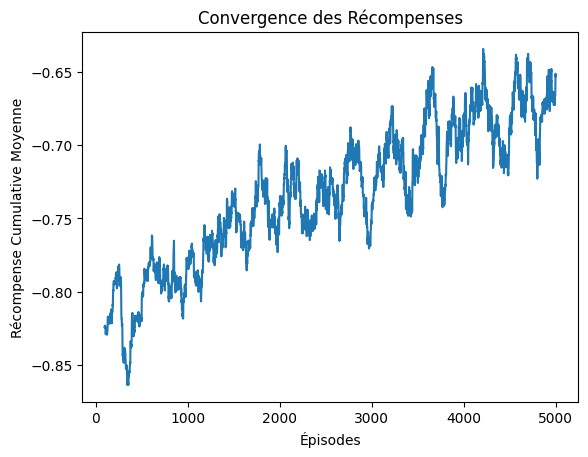

Entrez l'aéroport d'origine (ou 'exit' pour quitter) :  JFK
Entrez l'aéroport de destination :  SFO


Pour la route 'JFK-SFO', la meilleure compagnie aérienne est 'US Airways Inc.' avec un score de Q = -0.07.


Entrez l'aéroport d'origine (ou 'exit' pour quitter) :  exit


In [16]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


# Colonnes des retards
delay_columns = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

# Ajouter une colonne 'TotalDelays' si elle n'existe pas
if 'TotalDelays' not in delays_per_origin_destination_airline.columns:
    delays_per_origin_destination_airline['TotalDelays'] = delays_per_origin_destination_airline[delay_columns].sum(axis=1)

# Étape 1 : Nettoyer les Routes
valid_routes = delays_per_origin_destination_airline[['Origin', 'Dest']].drop_duplicates().reset_index(drop=True)
route_mapping = {f"{row['Origin']}-{row['Dest']}": idx for idx, row in valid_routes.iterrows()}
airlines = delays_per_origin_destination_airline['Airline'].unique()
airline_mapping = {airline: idx for idx, airline in enumerate(airlines)}

# Dimensions synchronisées
num_routes = len(route_mapping)
num_airlines = len(airline_mapping)
reward_matrix = np.full((num_routes, num_airlines), np.nan)

# Étape 2 : Filtrer les Données Valides
valid_data = delays_per_origin_destination_airline[
    delays_per_origin_destination_airline.apply(
        lambda row: f"{row['Origin']}-{row['Dest']}" in route_mapping and row['Airline'] in airline_mapping, axis=1
    )
].reset_index(drop=True)

print(f"Données valides avant réduction : {valid_data.shape[0]} lignes")

# Réduire les données valides à 3377 lignes arbitrairement
target_size = 3377
if valid_data.shape[0] > target_size:
    valid_data = valid_data.sample(n=target_size, random_state=42).reset_index(drop=True)

print(f"Données valides après réduction : {valid_data.shape[0]} lignes")

# Recalculer les routes valides après réduction
reduced_routes = valid_data[['Origin', 'Dest']].drop_duplicates().reset_index(drop=True)
route_mapping = {f"{row['Origin']}-{row['Dest']}": idx for idx, row in reduced_routes.iterrows()}

# Dimensions synchronisées avec les données réduites
num_routes = len(route_mapping)
reward_matrix = np.full((num_routes, num_airlines), np.nan)

print(f"Dimensions de la matrice après réduction : {reward_matrix.shape}")

# Étape 3 : Remplir la Matrice de Récompenses
for _, row in valid_data.iterrows():
    route_name = f"{row['Origin']}-{row['Dest']}"
    if route_name in route_mapping:
        route_index = route_mapping[route_name]
        airline_index = airline_mapping[row['Airline']]
        reward_matrix[route_index, airline_index] = -row['TotalDelays']

# Remplir les NaN et normaliser
reward_matrix = np.nan_to_num(reward_matrix, nan=-5000)
max_delay = valid_data['TotalDelays'].max()
reward_matrix = reward_matrix / max_delay

print("Matrice de récompenses corrigée et normalisée.")

# Étape 4 : Q-Learning
alpha = 0.5  # Taux d'apprentissage
gamma = 0.95  # Facteur de discount
epsilon = 0.2  # Exploration vs Exploitation
num_episodes = 5000  # Nombre d'épisodes

# Initialiser la table Q
Q = np.zeros_like(reward_matrix)

# Suivi des récompenses cumulées pour chaque épisode
cumulative_rewards = []

# Boucle d'apprentissage
for episode in range(num_episodes):
    epsilon = max(0.01, epsilon * 0.99)
    route = random.choice(range(num_routes))
    total_episode_reward = 0

    for _ in range(num_airlines):
        if np.random.uniform(0, 1) < epsilon:
            airline = random.choice(range(num_airlines))
        else:
            airline = np.argmax(Q[route, :])
        reward = reward_matrix[route, airline]
        next_action = np.argmax(Q[route, :])
        Q[route, airline] += alpha * (reward + gamma * Q[route, next_action] - Q[route, airline])
        total_episode_reward += reward

    cumulative_rewards.append(total_episode_reward)

print("Table Q entraînée.")

# Étape 5 : Visualiser la Convergence
window = 100
cumulative_rewards_smoothed = pd.Series(cumulative_rewards).rolling(window).mean()
plt.plot(cumulative_rewards_smoothed)
plt.title("Convergence des Récompenses")
plt.xlabel("Épisodes")
plt.ylabel("Récompense Cumulative Moyenne")
plt.show()

# Étape 6 : Recommandation
def get_best_airline_for_route(origin, destination, route_mapping, airline_mapping, Q):
    route_name = f"{origin}-{destination}"
    if route_name not in route_mapping:
        return f"La route '{route_name}' est introuvable."
    route_index = route_mapping[route_name]
    best_airline_index = np.argmax(Q[route_index, :])
    best_airline = [airline for airline, idx in airline_mapping.items() if idx == best_airline_index][0]
    best_score = Q[route_index, best_airline_index]
    return f"Pour la route '{route_name}', la meilleure compagnie aérienne est '{best_airline}' avec un score de Q = {best_score:.2f}."

# Exemple d'utilisation
while True:
    origin = input("Entrez l'aéroport d'origine (ou 'exit' pour quitter) : ")
    if origin.lower() == 'exit':
        break
    destination = input("Entrez l'aéroport de destination : ")
    print(get_best_airline_for_route(origin, destination, route_mapping, airline_mapping, Q))


In [12]:
import matplotlib.pyplot as plt

plt.plot(cumulative_rewards)
plt.title("Convergence de la récompense cumulative")
plt.xlabel("Épisode")
plt.ylabel("Récompense cumulative")
plt.show()

NameError: name 'cumulative_rewards' is not defined

Matrice de récompenses corrigée et normalisée.


Données valides avant réduction : 4635 lignes
Données valides après réduction : 3377 lignes
Dimensions de la matrice après réduction : (2674, 12)
Matrice de récompenses corrigée et normalisée.
Table Q entraînée.


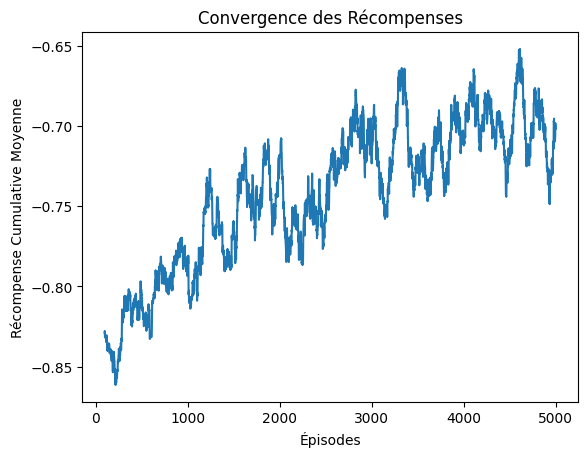

Entrez l'aéroport d'origine (ou 'exit' pour quitter) :  JFK
Entrez l'aéroport de destination :  SFO


Pour la route 'JFK-SFO', la meilleure compagnie aérienne est 'US Airways Inc.' avec un score de Q = -0.07.


Entrez l'aéroport d'origine (ou 'exit' pour quitter) :  IND
Entrez l'aéroport de destination :  BWI


Pour la route 'IND-BWI', la meilleure compagnie aérienne est 'Hawaiian Airlines Inc.' avec un score de Q = 0.00.


Entrez l'aéroport d'origine (ou 'exit' pour quitter) :  exit
